# What are the most demanded skills for the top3 most populari roles?

## Methodology:

  ##### 1.Clean-up skill column
  ##### 2.Calculaates skil count based on job_title_short
  ##### 3.Calculates skill percentage
  ##### 4. Plot final findings

In [133]:
#importing libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

#loading data

ds = load_dataset("lukebarousse/data_jobs")
df=ds['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])


pd.reset_option('display.max_rows',None)

df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [142]:
df_pl=df[df['job_country']=='Poland']


df_skills=df_pl.explode('job_skills')

df_skills[['job_title','job_skills']]

df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count=df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
912,python,Data Engineer,2240
1160,sql,Data Engineer,2231
1159,sql,Data Analyst,1572
93,azure,Data Engineer,1453
83,aws,Data Engineer,1251
...,...,...,...
1359,webex,Data Engineer,1
1357,watson,Senior Data Analyst,1
1355,watson,Data Analyst,1
1372,wire,Cloud Engineer,1


In [143]:
job_titles=df_skills_count['job_title_short'].unique().tolist()

job_titles=sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

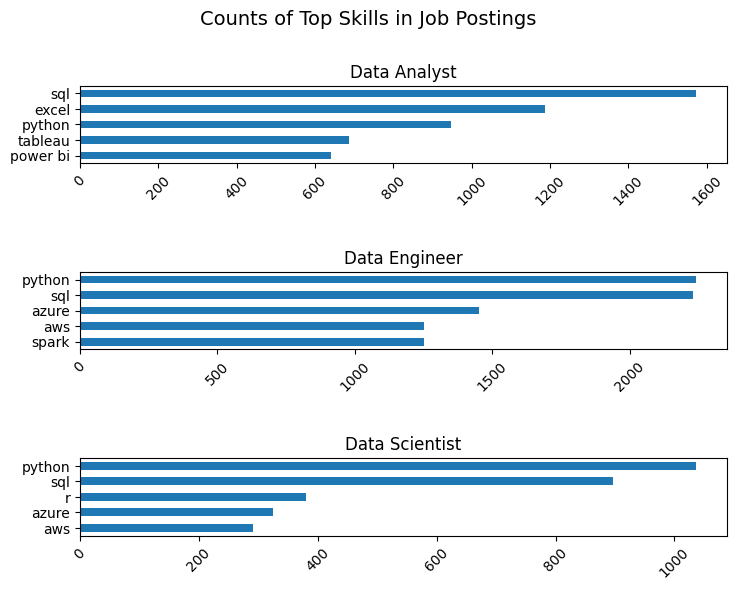

In [163]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 6))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    
    ax[i].legend().set_visible(False)
    
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)  

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=14, y=1.02)

plt.show(close=None, block=None)
